<a href="https://colab.research.google.com/github/SheetalData/Semantic_Segmentation/blob/main/Scripts/Detectron2_Model_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install dependency

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 7.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=23001fc97ddd23a87687430957492f58641501c2c00a80df27946c5d1919b2e2
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.


In [2]:
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 1.3 MB/s eta 0:10:36tcmalloc: large alloc 1147494400 bytes == 0x392ac000 @  0x7f36834a6615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████▋           | 1055.7 MB 1.2 MB/s eta 0:07:50tcmalloc: large alloc 1434370048 bytes == 0x7d902000 @  0x7f36834a6615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |██████████████████████████▏     | 

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.11.0+cu113 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
#pytorch version 1.10 and CUDA 11.1 is installed
#import torch
#import requests
#assert torch.__version__.startswith("1.9")

In [5]:

#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-pmo85km4
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-pmo85km4
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 153 kB 5.8 MB/s 
     |████████████████████████████████| 1.5 MB 9.1 MB/s 
     |████████████████████████████████| 549 kB 52.4 MB/s 
     |████████████████████████████████| 117 kB 27.4 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 182 kB 57.5 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp38-cp38-linux_x86_64.whl size=5254819 sha256=3ed205196fbcd1a5f9b5654542a36ac96eef85bdf3531bc10939070b3e700fd5
  Stored in directory: /tmp/pip-ephem-wheel-cache-na1elmpq/wheels/19/ac/65/

In [6]:
#Import Library

import pandas as pd
import numpy as np
import pandas as pd 
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm # progress bar
from datetime import datetime
import time
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os, json, cv2, random
import skimage.io as io
import copy
from pathlib import Path
from typing import Optional



from tqdm import tqdm
import itertools

import torch
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from glob import glob
import numba
from numba import jit

import warnings
warnings.filterwarnings('ignore') #Ignore "future" warnings and Data-Frame-Slicing warnings.


# detectron2
#from detectron2.structures import BoxMode
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
from detectron2.evaluation import COCOEvaluator
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

setup_logger()

<Logger detectron2 (DEBUG)>

In [7]:
#Data_Register_training="Train";
#Data_Register_valid="Valid";
from detectron2.data.datasets import register_coco_instances


register_coco_instances("Data_Register_training",{}, "/content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json", "/content/drive/MyDrive/Data/Merge/results/Train")
register_coco_instances("Data_Register_valid",{},"/content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json", "/content/drive/MyDrive/Data/Merge/results/Valid")

metadata = MetadataCatalog.get("Data_Register_training")
dataset_train = DatasetCatalog.get("Data_Register_training")
dataset_valid = DatasetCatalog.get("Data_Register_valid")

[12/12 14:33:00 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json takes 7.43 seconds.
WARNING [12/12 14:33:00 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/12 14:33:00 d2.data.datasets.coco]: Loaded 6975 images in COCO format from /content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json
[12/12 14:33:06 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json takes 3.79 seconds.
WARNING [12/12 14:33:06 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/12 14:33:06 d2.data.datasets.coco]: Loaded 2100 images in COCO format from /content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json


In [8]:
for d in dataset_train:
    for obj in d['annotations']:
        if 'segmentation' not in obj:
            print(f'{d["file_name"]} has an annotation with no segmentation field')

/content/drive/MyDrive/Data/Merge/results/Train/000000007988.jpg has an annotation with no segmentation field


(427, 640, 3)


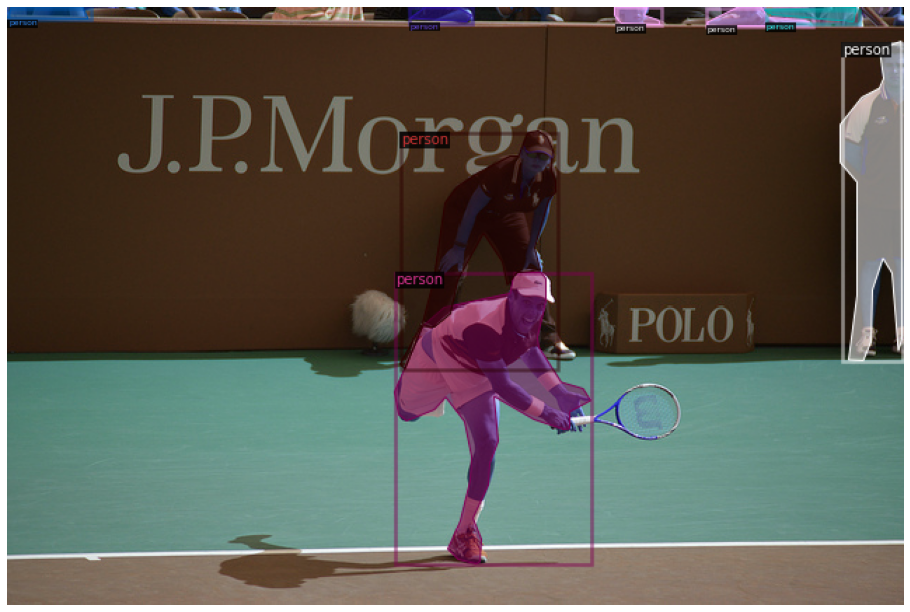

In [9]:
fig, ax = plt.subplots(figsize =(18,11))
d=dataset_valid[4] 
img = cv2.imread(d["file_name"])
print(img.shape)
v = Visualizer(img[:, :, ::-1],
                metadata=metadata, 
                scale=1,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_dataset_dict(d)
ax.grid(False)
ax.axis('off')
ax.imshow(out.get_image()[:, :, ::-1])

In [10]:
#Training
cfg = get_cfg()
config_name = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml" 
cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = ("Data_Register_training",)
cfg.DATASETS.TEST = ("Data_Register_valid",)

#cfg.MODEL.WEIGHTS ="../input/detectron2cell/output/model_final.pth"

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_name)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64  # 64 is slower but more accurate (128 faster but less accurate)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 250
cfg.SOLVER.IMS_PER_BATCH = 2 #(2 is per defaults)
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

cfg.SOLVER.BASE_LR = 0.0005 
#cfg.SOLVER.MOMENTUM = 0.9
#cfg.SOLVER.WEIGHT_DECAY = 0.0005
#cfg.SOLVER.GAMMA = 0.1
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 147
    
cfg.SOLVER.WARMUP_ITERS = 10 
cfg.SOLVER.MAX_ITER = 2000 
cfg.SOLVER.STEPS = (500, 1000) 
cfg.TEST.EVAL_PERIOD = 250
cfg.SOLVER.CHECKPOINT_PERIOD=250

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) 
trainer = DefaultTrainer(cfg)  # without data augmentation
trainer.resume_or_load(resume=False)
trainer.train()

[12/12 14:33:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:15, 11.8MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/12 14:34:04 d2.engine.train_loop]: Starting training from iteration 0
[12/12 14:35:31 d2.utils.events]:  eta: 0:33:21  iter: 19  total_loss: 6.461  loss_cls: 4.394  loss_box_reg: 0.7651  loss_mask: 0.6885  loss_rpn_cls: 0.4532  loss_rpn_loc: 0.3923  time: 1.1369  data_time: 3.7534  lr: 0.0005  max_mem: 2685M
[12/12 14:35:54 d2.utils.events]:  eta: 0:29:56  iter: 39  total_loss: 3.244  loss_cls: 1.59  loss_box_reg: 0.7504  loss_mask: 0.6416  loss_rpn_cls: 0.1754  loss_rpn_loc: 0.179  time: 1.1301  data_time: 0.5361  lr: 0.0005  max_mem: 2969M
[12/12 14:36:15 d2.utils.events]:  eta: 0:30:34  iter: 59  total_loss: 3.414  loss_cls: 1.539  loss_box_reg: 0.7567  loss_mask: 0.6031  loss_rpn_cls: 0.1877  loss_rpn_loc: 0.2852  time: 1.1110  data_time: 0.5099  lr: 0.0005  max_mem: 2969M
[12/12 14:36:38 d2.utils.events]:  eta: 0:30:15  iter: 79  total_loss: 3.073  loss_cls: 1.383  loss_box_reg: 0.6802  loss_mask: 0.5816  loss_rpn_cls: 0.1679  loss_rpn_loc: 0.2832  time: 1.1207  data_time: 0.5

KeyError: ignored

In [ ]:
from detectron2.evaluation.evaluator import DatasetEvaluator
import pycocotools.mask as mask_util
def precision_at(threshold, iou):
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) == 1  # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    return np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)

def score(pred, targ):
    pred_masks = pred['instances'].pred_masks.cpu().numpy()
    enc_preds = [mask_util.encode(np.asarray(p, order='F')) for p in pred_masks]
    enc_targs = list(map(lambda x:x['segmentation'], targ))
    ious = mask_util.iou(enc_preds, enc_targs, [0]*len(enc_targs))
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, ious)
        p = tp / (tp + fp + fn)
        prec.append(p)
    return np.mean(prec)

class MAPIOUEvaluator(DatasetEvaluator):
    def __init__(self, dataset_name):
        dataset_dicts = DatasetCatalog.get(dataset_name)
        self.annotations_cache = {item['image_id']:item['annotations'] for item in dataset_dicts}
            
    def reset(self):
        self.scores = []

    def process(self, inputs, outputs):
        for inp, out in zip(inputs, outputs):
            if len(out['instances']) == 0:
                self.scores.append(0)    
            else:
                targ = self.annotations_cache[inp['image_id']]
                self.scores.append(score(out, targ))

    def evaluate(self):
        return {"MaP IoU": np.mean(self.scores)}



In [ ]:
#Evaluation

In [ ]:
evaluator = COCOEvaluator("Data_Register_valid", cfg, False, output_dir="./output/")
cfg.MODEL.WEIGHTS="../input/detectron2cell/output/model_final.pth"
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2   # set a custom testing threshold
#cfg.INPUT.MASK_FORMAT='polygon'
val_loader = build_detection_test_loader(cfg, "Data_Register_valid")
inference_on_dataset(trainer.model, val_loader, evaluator)

In [ ]:
import pandas as pd
metrics_df = pd.read_json("./output/metrics.json", orient="records", lines=True)
mdf = metrics_df.sort_values("iteration")

In [ ]:
#Training Progress

In [ ]:
# 1. Loss curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["total_loss"].isna()]
ax.plot(mdf1["iteration"], mdf1["total_loss"], c="C0", label="train")
if "validation_loss" in mdf.columns:
    mdf2 = mdf[~mdf["validation_loss"].isna()]
    ax.plot(mdf2["iteration"], mdf2["validation_loss"], c="C1", label="validation")

# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Loss curve")
plt.show()

In [ ]:
# 2. Accuracy curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["fast_rcnn/cls_accuracy"].isna()]
ax.plot(mdf1["iteration"], mdf1["fast_rcnn/cls_accuracy"], c="C0", label="train")
# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Accuracy curve")
plt.show()

In [ ]:
#Prediction

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#cfg.MODEL.WEIGHTS = "./output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("Data_Register_valid", )
predictor = DefaultPredictor(cfg)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize =(20,50))
indices=[ax[0],ax[1],ax[2],ax[3] ]
i=-1
for d in random.sample(dataset_valid, 4):
    i=i+1    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])